In [7]:
# set plots to showup inline and load packages

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
apple = pd.read_csv('/Users/brucehao/Google Drive/CUNY/git/DATA602/apple.2011.csv')

In [9]:
# note percent change column is unmamed and of type object
apple.head()
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
Date          252 non-null object
Last          252 non-null float64
Unnamed: 2    252 non-null object
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [10]:
# rename columns, drop first row and change PctChange column to numeric type
apple.columns = ['Date', 'Last', 'PctChange']
apple = apple.iloc[1:,]
apple['PctChange'] = pd.to_numeric(apple['PctChange'])
apple.info()
apple.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 1 to 251
Data columns (total 3 columns):
Date         251 non-null object
Last         251 non-null float64
PctChange    251 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


,Date,Last,PctChange
247,12/23/2011,403.33,0.011993
248,12/27/2011,406.53,0.007934
249,12/28/2011,402.64,-0.009569
250,12/29/2011,405.12,0.006159
251,12/30/2011,405.00,-0.000296


In [11]:
# function to generate t+20 day stock price based on bootstrapping
def gen_price_t20():
    #np.random.seed(123)
    x = apple.PctChange.values
    ret = np.random.choice(x, size=20, replace=True)
    ret_cum = np.exp(np.sum(np.log(ret + 1)))
    price = apple.Last.tail(1).values
    return np.asscalar(price * ret_cum)

gen_price_t20()

413.26532619600533

In [15]:
%%time

# generate 10000 t+20 day stock prices
sim = []
for i in np.arange(100000):
    sim.append(gen_price_t20())

CPU times: user 17 s, sys: 172 ms, total: 17.2 s
Wall time: 17.2 s


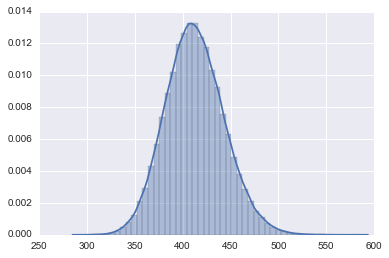

In [13]:
sns.distplot(sim)

In [14]:
# show 1% percentile stock value
np.percentile(sim, 0.01)

309.26831898530003